In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [8]:
filepath_dict = {
    'yelp': './Dataset/yelp_labelled.txt',
    'imdb': './Dataset/imdb_labelled.txt',
    'amzn': './Dataset/amazon_cells_labelled.txt'
}

In [9]:
df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source
    df_list.append(df)

In [11]:
df = pd.concat(df_list)
del df_list

In [14]:
df.shape

(2748, 3)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2748 entries, 0 to 999
Data columns (total 3 columns):
sentence    2748 non-null object
label       2748 non-null int64
source      2748 non-null object
dtypes: int64(1), object(2)
memory usage: 85.9+ KB


### Defining stop_words

In [28]:
import string
from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
for i in string.punctuation:
    english_stop_words.append(i)

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier

### Logistic regression model

In [60]:
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values
    
    sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
    vectorizer = CountVectorizer(stop_words=english_stop_words)
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)
    
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print('Accuracy for {} data: {:.4f}'.format(source, score))

Accuracy for amzn data: 0.8040
Accuracy for imdb data: 0.8075
Accuracy for yelp data: 0.7520


/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### SGD classifier

In [56]:
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values
    
    sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
    vectorizer = CountVectorizer(stop_words=english_stop_words)
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)
    
    classifier = SGDClassifier()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print('Accuracy for {} data: {:.4f}'.format(source, score))

Accuracy for amzn data: 0.7720
Accuracy for imdb data: 0.7166
Accuracy for yelp data: 0.7120


/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


### Naive-bayes model

In [52]:
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values
    
    sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
    vectorizer = CountVectorizer(stop_words=english_stop_words)
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)
    
    classifier = BernoulliNB()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print('Accuracy for {} data: {:.4f}'.format(source, score))

Accuracy for amzn data: 0.7720
Accuracy for imdb data: 0.7326
Accuracy for yelp data: 0.7560


### Random-Forest model

In [54]:
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values
    
    sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
    vectorizer = CountVectorizer(stop_words=english_stop_words)
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)
    
    classifier = RandomForestClassifier()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print('Accuracy for {} data: {:.4f}'.format(source, score))

/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy for amzn data: 0.7840
Accuracy for imdb data: 0.7166
Accuracy for yelp data: 0.7280


/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Error Analysis

In [62]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


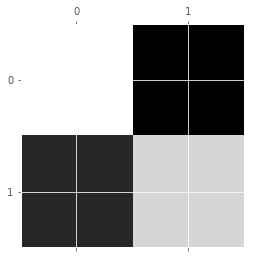

/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


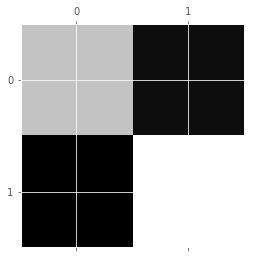

/home/info/anaconda3/envs/hackathon/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


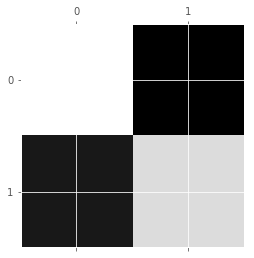

In [63]:
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values
    
    sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
    vectorizer = CountVectorizer(stop_words=english_stop_words)
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)
    
    classifier = LogisticRegression()
    y_train_pred = cross_val_predict(classifier, X_train, y_train, cv=5)
    conf_mx = confusion_matrix(y_train, y_train_pred)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    plt.show()
    